In [7]:
import numpy as np
from numpy import ma
import math
import scipy
import scipy.constants as constants
import os
from IPython.display import Image

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [4]:
# 2*2.5

FILEDIR1 = '/n/home12/hongwei/HONGWEI/merra2_2x25_standard_2/'
NcFile1   = Dataset(FILEDIR1+'/GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]
EU1              = NcFile1.variables['SpeciesConc_PASV_EU']
LA1              = NcFile1.variables['SpeciesConc_PASV_LA']

GC_AREA1 = NcFile1.variables['AREA'][:,:]


# 4*5
FILEDIR2 = '/n/home12/hongwei/HONGWEI/merra2_4x5_standard_2/'
NcFile2   = Dataset(FILEDIR2+'/GEOSChem.SpeciesConc_inst.20150101_0000z.nc4','r',format='NETCDF4_CLASSIC')

lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]
EU2              = NcFile2.variables['SpeciesConc_PASV_EU']
LA2              = NcFile2.variables['SpeciesConc_PASV_LA']

GC_AREA2 = NcFile2.variables['AREA'][:,:];

EU1

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    _FillValue: -1e+31
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (31, 72, 91, 144)
filling off

In [3]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

AD_file1 = open(FILEDIR1+'State_Met_AD_backup.txt','r')

GC_AD1 = EU1[0,:,:,:]*0.0

Nx1 = len(EU1[0,0,0,:])
Ny1 = len(EU1[0,0,:,0])
Nz1 = len(EU1[0,:,0,0])
Nt1 = len(EU1[:,0,0,0])

for ix in range(Nx1):
    for iy in range(Ny1):
        for iz in range(Nz1):
            line = AD_file1.readline()
            GC_AD1[iz,iy,ix] = float(line)
            
            
AD_file2 = open(FILEDIR2+'State_Met_AD_backup.txt','r')

GC_AD2 = EU2[0,:,:,:]*0.0

Nx2 = len(EU2[0,0,0,:])
Ny2 = len(EU2[0,0,:,0])
Nz2 = len(EU2[0,:,0,0])
Nt2 = len(EU2[:,0,0,0])

for ix in range(Nx2):
    for iy in range(Ny2):
        for iz in range(Nz2):
            line = AD_file2.readline()
            GC_AD2[iz,iy,ix] = float(line)

In [16]:
# 3-D entropy

k = constants.k
print(f'Boltzmann constant={k}')

# change total air mass from kg to mol

AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
AD2_mol = GC_AD2[:,:,:]*1000.0/28.97

# entropy
S_EU1 = -k*np.sum( GC_AD1[:,:,:]*EU1[30,:,:,:]* np.log(EU1[30,:,:,:], out=np.zeros_like(EU1[30,:,:,:]), where=(EU1[30,:,:,:]!=0)), axis=(0,1,2) )
S_LA1 = -k*np.sum( GC_AD1[:,:,:]*LA1[30,:,:,:]* np.log(LA1[30,:,:,:], out=np.zeros_like(LA1[30,:,:,:]), where=(LA1[30,:,:,:]!=0)), axis=(0,1,2) )

S_EU2 = -k*np.sum( GC_AD2[:,:,:]*EU2[30,:,:,:]* np.log(EU2[30,:,:,:], out=np.zeros_like(EU2[30,:,:,:]), where=(EU2[30,:,:,:]!=0)), axis=(0,1,2) )
S_LA2 = -k*np.sum( GC_AD2[:,:,:]*LA2[30,:,:,:]* np.log(LA2[30,:,:,:], out=np.zeros_like(LA2[30,:,:,:]), where=(LA2[30,:,:,:]!=0)), axis=(0,1,2) )

print(S_EU1, S_LA1)
print(S_EU2, S_LA2)

Boltzmann constant=1.380649e-23
9.646564188722001e-17 9.3846184862235e-17
9.662097180296501e-17 9.436565404848501e-17


In [17]:
# 2-D entropy corresponding to the below contour figure

k = constants.k
print(f'Boltzmann constant={k}')

# change total air mass from kg to mol:
AD1_mol = GC_AD1[:,:,:]*1000.0/28.97
AD2_mol = GC_AD2[:,:,:]*1000.0/28.97

AD1_mol_Zsum = np.sum(AD1_mol, axis=0)
AD2_mol_Zsum = np.sum(AD2_mol, axis=0)

# change 3D mixing ratio to 2D:
EU1_mol_Zsum = np.sum( EU1[30,:,:,:]*AD1_mol[:,:,:], axis=0)
LA1_mol_Zsum = np.sum( LA1[30,:,:,:]*AD1_mol[:,:,:], axis=0)

EU2_mol_Zsum = np.sum( EU2[30,:,:,:]*AD2_mol[:,:,:], axis=0)
LA2_mol_Zsum = np.sum( LA2[30,:,:,:]*AD2_mol[:,:,:], axis=0)

# calculate 2D mixing ratio:
EU1_MR = EU1_mol_Zsum/AD1_mol_Zsum
LA1_MR = LA1_mol_Zsum/AD1_mol_Zsum

EU2_MR = EU2_mol_Zsum/AD2_mol_Zsum
LA2_MR = LA2_mol_Zsum/AD2_mol_Zsum

# entropy
S2_EU1 = -k*np.sum( AD1_mol_Zsum[:,:]*EU1_MR[:,:]* np.log(EU1_MR[:,:], out=np.zeros_like(EU1_MR[:,:]), where=(EU1_MR[:,:]!=0)), axis=(0,1) )
S2_LA1 = -k*np.sum( AD1_mol_Zsum[:,:]*LA1_MR[:,:]* np.log(LA1_MR[:,:], out=np.zeros_like(LA1_MR[:,:]), where=(LA1_MR[:,:]!=0)), axis=(0,1) )

S2_EU2 = -k*np.sum( AD2_mol_Zsum[:,:]*EU2_MR[:,:]* np.log(EU2_MR[:,:], out=np.zeros_like(EU2_MR[:,:]), where=(EU2_MR[:,:]!=0)), axis=(0,1) )
S2_LA2 = -k*np.sum( AD2_mol_Zsum[:,:]*LA2_MR[:,:]* np.log(LA2_MR[:,:], out=np.zeros_like(LA2_MR[:,:]), where=(LA2_MR[:,:]!=0)), axis=(0,1) )

print(S2_EU1, S2_LA1)
print(S2_EU2, S2_LA2)


Boltzmann constant=1.380649e-23
3.742113258638401e-15 3.69180329269376e-15
3.75111641554144e-15 3.7135574610492805e-15


In [12]:
### change unit, do average

EU1_molec = EU1[:,:,:,:]*0.0
for i in range(Nt1):
    EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)



LA1_molec = LA1[:,:,:,:]*0.0
for i in range(Nt1):
    LA1_molec[i,:,:,:] = LA1[i,:,:,:]*(GC_AD1[:,:,:]*1000.0/28.97)*NA


LA1_Zsum = np.sum(LA1_molec[:,:,:,:], axis=1)
for i in range(Nt1):
    LA1_Zsum[i,:,:]   = LA1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4

LA1_Zsum_Xmean = np.mean(LA1_Zsum[:,:,:], axis=2)


In [13]:
EU2_molec = EU2[:,:,:,:]*0.0
for i in range(Nt2):
    EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)



LA2_molec = LA2[:,:,:,:]*0.0
for i in range(Nt2):
    LA2_molec[i,:,:,:] = LA2[i,:,:,:]*(GC_AD2[:,:,:]*1000.0/28.97)*NA


LA2_Zsum = np.sum(LA2_molec[:,:,:,:], axis=1)
for i in range(Nt2):
    LA2_Zsum[i,:,:]   = LA2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4

LA2_Zsum_Xmean = np.mean(LA2_Zsum[:,:,:], axis=2)

In [14]:
# delete original variable to save memory
del EU1, LA1, EU2, LA2

In [15]:
# concentration
LA1_Zsum_1D = LA1_Zsum[Nt1-1,:,:].reshape(Nx1*Ny1)
EU1_Zsum_1D = EU1_Zsum[Nt1-1,:,:].reshape(Nx1*Ny1)
LA2_Zsum_1D = LA2_Zsum[Nt1-1,:,:].reshape(Nx2*Ny2)
EU2_Zsum_1D = EU2_Zsum[Nt1-1,:,:].reshape(Nx2*Ny2)

# grid cell area
GC_AREA1_1D = GC_AREA1.reshape(Nx1*Ny1)
GC_AREA2_1D = GC_AREA2.reshape(Nx2*Ny2)

# grid cell mass for injected tracer
LA1_molec_Zsum = np.sum(LA1_molec[Nt1-1,:,:,:], axis=0)
EU1_molec_Zsum = np.sum(EU1_molec[Nt1-1,:,:,:], axis=0)
LA2_molec_Zsum = np.sum(LA2_molec[Nt1-1,:,:,:], axis=0)
EU2_molec_Zsum = np.sum(EU2_molec[Nt1-1,:,:,:], axis=0)

LA1_molec_Zsum_1D = LA1_molec_Zsum.reshape(Nx1*Ny1)
EU1_molec_Zsum_1D = EU1_molec_Zsum.reshape(Nx1*Ny1)
LA2_molec_Zsum_1D = LA2_molec_Zsum.reshape(Nx2*Ny2)
EU2_molec_Zsum_1D = EU2_molec_Zsum.reshape(Nx2*Ny2)

# get index for sorted concentration
LA1_index = LA1_Zsum_1D.argsort()
LA1_area_sorted = GC_AREA1_1D[LA1_index]
LA1_mass_sorted = LA1_molec_Zsum_1D[LA1_index]

EU1_index = EU1_Zsum_1D.argsort()
EU1_area_sorted = GC_AREA1_1D[LA1_index]
EU1_mass_sorted = EU1_molec_Zsum_1D[EU1_index]

LA2_index = LA2_Zsum_1D.argsort()
LA2_area_sorted = GC_AREA2_1D[LA2_index]
LA2_mass_sorted = LA2_molec_Zsum_1D[LA2_index]

EU2_index = EU2_Zsum_1D.argsort()
EU2_area_sorted = GC_AREA2_1D[LA2_index]
EU2_mass_sorted = EU2_molec_Zsum_1D[EU2_index]

In [16]:
# cumulative sum
LA1_area_cumsum = np.cumsum(LA1_area_sorted)
LA1_mass_cumsum = np.cumsum(LA1_mass_sorted)

EU1_area_cumsum = np.cumsum(EU1_area_sorted)
EU1_mass_cumsum = np.cumsum(EU1_mass_sorted)

LA2_area_cumsum = np.cumsum(LA2_area_sorted)
LA2_mass_cumsum = np.cumsum(LA2_mass_sorted)

EU2_area_cumsum = np.cumsum(EU2_area_sorted)
EU2_mass_cumsum = np.cumsum(EU2_mass_sorted)

# calculate fraction
length1 = len(LA1_area_cumsum)
LA1_area_cumsum_frac = LA1_area_cumsum/LA1_area_cumsum[length1-1]
LA1_mass_cumsum_frac = LA1_mass_cumsum/LA1_mass_cumsum[length1-1]

EU1_area_cumsum_frac = EU1_area_cumsum/EU1_area_cumsum[length1-1]
EU1_mass_cumsum_frac = EU1_mass_cumsum/EU1_mass_cumsum[length1-1]

length2 = len(LA2_area_cumsum)
LA2_area_cumsum_frac = LA2_area_cumsum/LA2_area_cumsum[length2-1]
LA2_mass_cumsum_frac = LA2_mass_cumsum/LA2_mass_cumsum[length2-1]

EU2_area_cumsum_frac = EU2_area_cumsum/EU2_area_cumsum[length2-1]
EU2_mass_cumsum_frac = EU2_mass_cumsum/EU2_mass_cumsum[length2-1]

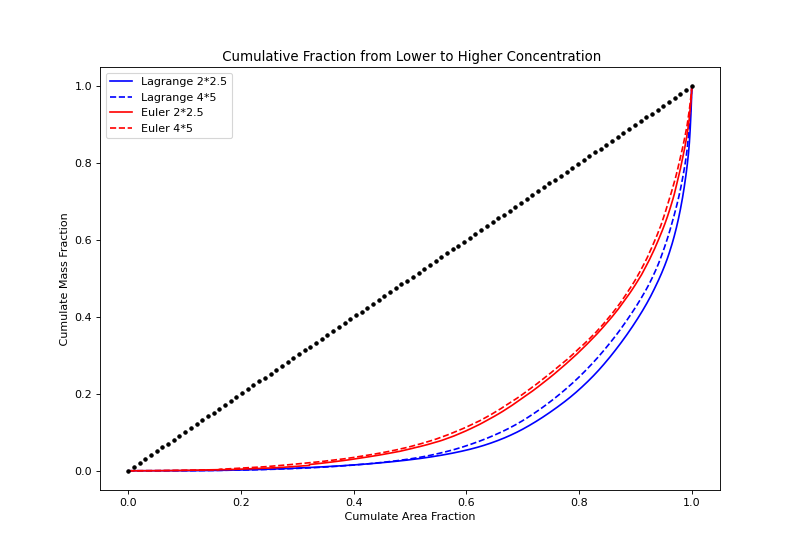

In [19]:
# calculate Gini coefficient

diag = np.linspace(0,1,100)
Al = np.trapz(diag, diag)

LA1 = np.trapz(LA1_mass_cumsum_frac, LA1_area_cumsum_frac)
LA2 = np.trapz(LA2_mass_cumsum_frac, LA2_area_cumsum_frac)

EU1 = np.trapz(EU1_mass_cumsum_frac, EU1_area_cumsum_frac)
EU2 = np.trapz(EU2_mass_cumsum_frac, EU2_area_cumsum_frac)

Gini_La1 = (Al-LA1)/Al
Gini_La2 = (Al-LA2)/Al

Gini_Eu1 = (Al-EU1)/Al
Gini_Eu2 = (Al-EU2)/Al

print(Al)
print('Gini_La_Eu')
print(Gini_La1)
print(Gini_La2)
print(Gini_Eu1)
print(Gini_Eu2)

0.5
Gini_La_Eu
0.767243042588234
0.7411029636859894
0.6816217303276062
0.6668221652507782


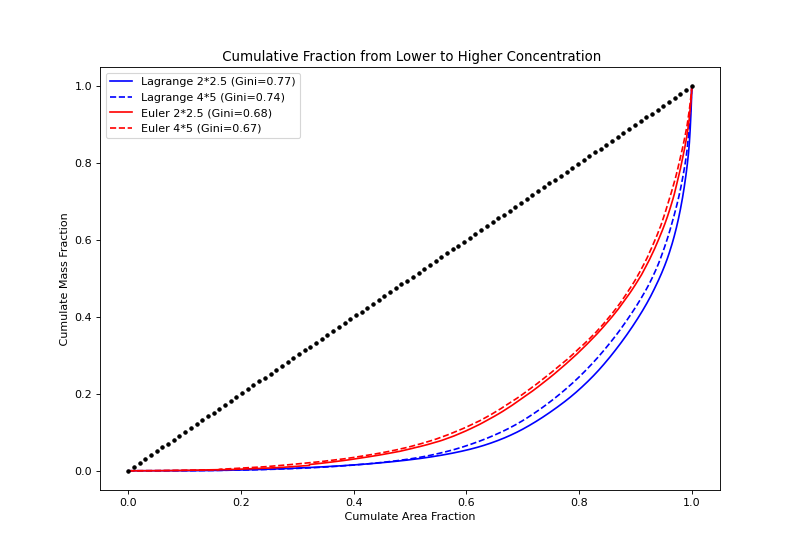

In [24]:
# Plot CFD curve: mass vs. area
plt.figure(figsize=(10,7), dpi= 80)

plt.plot(LA1_area_cumsum_frac,LA1_mass_cumsum_frac,'b',label=f'Lagrange 2*2.5 (Gini={Gini_La1:.2f})')
plt.plot(LA2_area_cumsum_frac,LA2_mass_cumsum_frac,'b--',label=f'Lagrange 4*5 (Gini={Gini_La2:.2f})')

plt.plot(EU1_area_cumsum_frac,EU1_mass_cumsum_frac,'r',label=f'Euler 2*2.5 (Gini={Gini_Eu1:.2f})')
plt.plot(EU2_area_cumsum_frac,EU2_mass_cumsum_frac,'r--',label=f'Euler 4*5 (Gini={Gini_Eu2:.2f})')

diag = np.linspace(0,1,100)
plt.plot(diag,diag,'k.')


#plt.legend(loc='upper left')
plt.title(' Cumulative Fraction from Lower to Higher Concentration')
plt.xlabel(' Cumulate Area Fraction ')
plt.ylabel(' Cumulate Mass Fraction ')
plt.legend()

plt.savefig('CDF_Area_Mass.png')
plt.clf();
plt.cla();
plt.close();

Image('CDF_Area_Mass.png') 